**1. Import Libraries**

In [1]:
import pandas as pd

**2. Data Understanding**

Importing data.

In [2]:
links_df = pd.read_csv('Data/links.csv')

print(links_df.shape)
print(links_df.duplicated().sum())
print(links_df.isna().sum())
links_df.head()

(9742, 3)
0
movieId    0
imdbId     0
tmdbId     8
dtype: int64


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [3]:
movies_df = pd.read_csv('Data/movies.csv')

print(movies_df.shape)
print(movies_df.duplicated().sum())
print(movies_df.isna().sum())
movies_df.head()

(9742, 3)
0
movieId    0
title      0
genres     0
dtype: int64


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings_df = pd.read_csv('Data/ratings.csv')

print(ratings_df.shape)
print(ratings_df.duplicated().sum())
print(ratings_df.isna().sum())
ratings_df.head()

(100836, 4)
0
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
tags_df = pd.read_csv('Data/tags.csv')

print(tags_df.shape)
print(tags_df.duplicated().sum())
print(tags_df.isna().sum())
tags_df.head()

(3683, 4)
0
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


**3. Explatory Data Analysis (EDA)**

Start with timestamp conversion on ratings and tags dataframes.

In [6]:
def process_timestamps(ratings_df):
    
    # Convert 'timestamp' column to datetime
    ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
    
    # Extract various date and time components
    ratings_df['year'] = ratings_df['timestamp'].dt.year
    ratings_df['month'] = ratings_df['timestamp'].dt.month
    ratings_df['day'] = ratings_df['timestamp'].dt.day
    ratings_df['hour'] = ratings_df['timestamp'].dt.hour
    ratings_df['minute'] = ratings_df['timestamp'].dt.minute
    ratings_df['second'] = ratings_df['timestamp'].dt.second

    # Drop the original 'timestamp' column
    ratings_df = ratings_df.drop(columns=['timestamp'])
    
    return ratings_df

ratings_df = process_timestamps(ratings_df)
ratings_df.head()

,userId,movieId,rating,year,month,day,hour,minute,second
0,1,1,4.0,2000,7,30,18,45,3
1,1,3,4.0,2000,7,30,18,20,47
2,1,6,4.0,2000,7,30,18,37,4
3,1,47,5.0,2000,7,30,19,3,35
4,1,50,5.0,2000,7,30,18,48,51


In [7]:
tags_df = process_timestamps(tags_df)
tags_df.head()

,userId,movieId,tag,year,month,day,hour,minute,second
0,2,60756,funny,2015,10,24,19,29,54
1,2,60756,Highly quotable,2015,10,24,19,29,56
2,2,60756,will ferrell,2015,10,24,19,29,52
3,2,89774,Boxing story,2015,10,24,19,33,27
4,2,89774,MMA,2015,10,24,19,33,20


Explode movie_df to avoid the problem of sparcity.

In [8]:
movies_df['genres'] = movies_df['genres'].str.split('|')
movies_df = movies_df.explode('genres')

print('Total no. of genres:', movies_df.genres.nunique())
print(movies_df.genres.value_counts())
movies_df.head()

Total no. of genres: 20
genres
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64


,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy


Merge our dataframes.

In [11]:
# Merge ratings_df to movies_df
movie_ratings_df = pd.merge(ratings_df, movies_df, on='movieId', how='left')

print(movie_ratings_df.shape)
movie_ratings_df.head()

(274480, 11)


,userId,movieId,rating,year,month,day,hour,minute,second,title,genres
0,1,1,4.0,2000,7,30,18,45,3,Toy Story (1995),Adventure
1,1,1,4.0,2000,7,30,18,45,3,Toy Story (1995),Animation
2,1,1,4.0,2000,7,30,18,45,3,Toy Story (1995),Children
3,1,1,4.0,2000,7,30,18,45,3,Toy Story (1995),Comedy
4,1,1,4.0,2000,7,30,18,45,3,Toy Story (1995),Fantasy


In [10]:
tags_movies_df = pd.merge(tags_df, movies_df, on = 'movieId', how = 'left')

print(tags_movies_df.shape)
print(tags_movies_df.tag.nunique())
tags_movies_df.head(10)

(9938, 11)
1589


,userId,movieId,tag,year,month,day,hour,minute,second,title,genres
0,2,60756,funny,2015,10,24,19,29,54,Step Brothers (2008),Comedy
1,2,60756,Highly quotable,2015,10,24,19,29,56,Step Brothers (2008),Comedy
2,2,60756,will ferrell,2015,10,24,19,29,52,Step Brothers (2008),Comedy
3,2,89774,Boxing story,2015,10,24,19,33,27,Warrior (2011),Drama
4,2,89774,MMA,2015,10,24,19,33,20,Warrior (2011),Drama
5,2,89774,Tom Hardy,2015,10,24,19,33,25,Warrior (2011),Drama
6,2,106782,drugs,2015,10,24,19,30,54,"Wolf of Wall Street, The (2013)",Comedy
7,2,106782,drugs,2015,10,24,19,30,54,"Wolf of Wall Street, The (2013)",Crime
8,2,106782,drugs,2015,10,24,19,30,54,"Wolf of Wall Street, The (2013)",Drama
9,2,106782,Leonardo DiCaprio,2015,10,24,19,30,51,"Wolf of Wall Street, The (2013)",Comedy


In [13]:
movie_ratings_df.rating.value_counts()

rating
4.0    73030
3.0    54292
3.5    36473
5.0    36452
4.5    23883
2.0    19890
2.5    14982
1.0     7156
1.5     4628
0.5     3694
Name: count, dtype: int64

In [14]:
print(movie_ratings_df.userId.nunique())
print(movie_ratings_df.movieId.nunique())

610
9724


**4. Data Analysis**

Begin with visualizing the ratings distribution to see how users have rated the movies.

c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


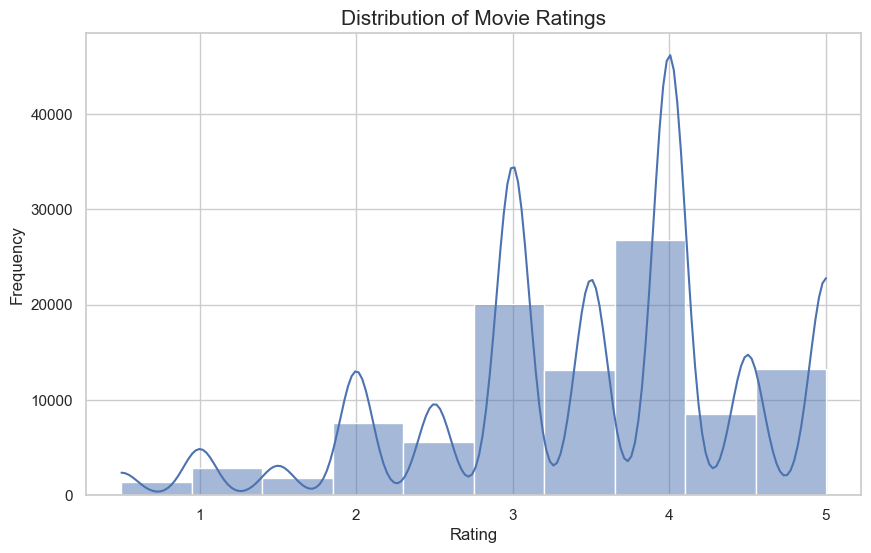

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a style for the plots
sns.set(style="whitegrid")

# Plotting the distribution of ratings
plt.figure(figsize=(10,6))
sns.histplot(ratings_df['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings', fontsize=15)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

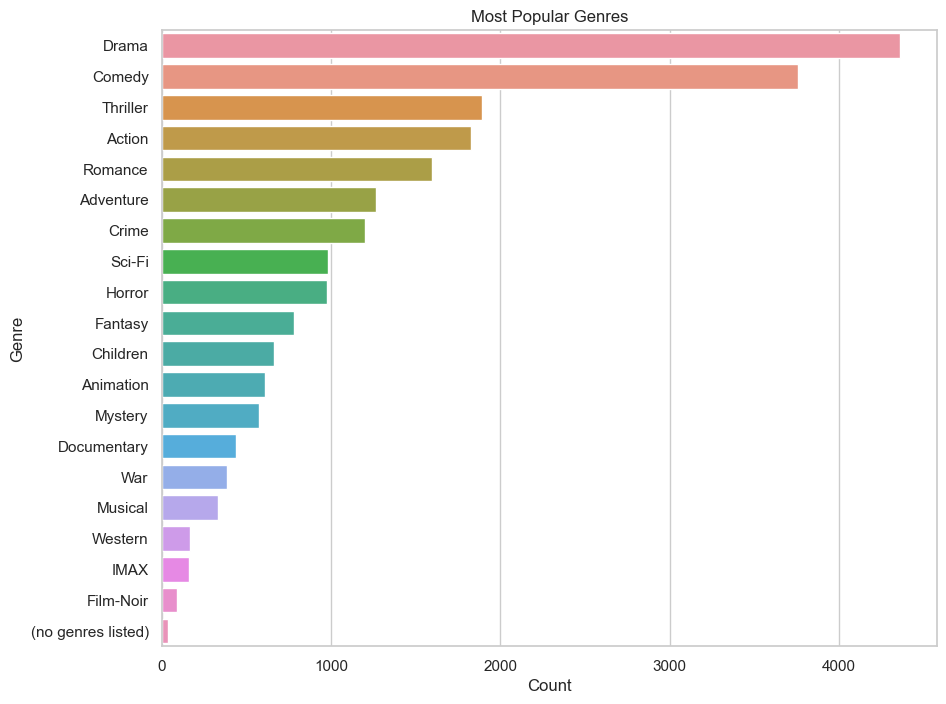

In [16]:
genres = (movies_df['genres'])

# Plot the most popular genres
plt.figure(figsize=(10, 8))
sns.countplot(y=genres, order=genres.value_counts().index)
plt.title('Most Popular Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()